#**🎨Introduction :**


##**Detecting Fraud transactions of ETHEREUM**🕵️ 

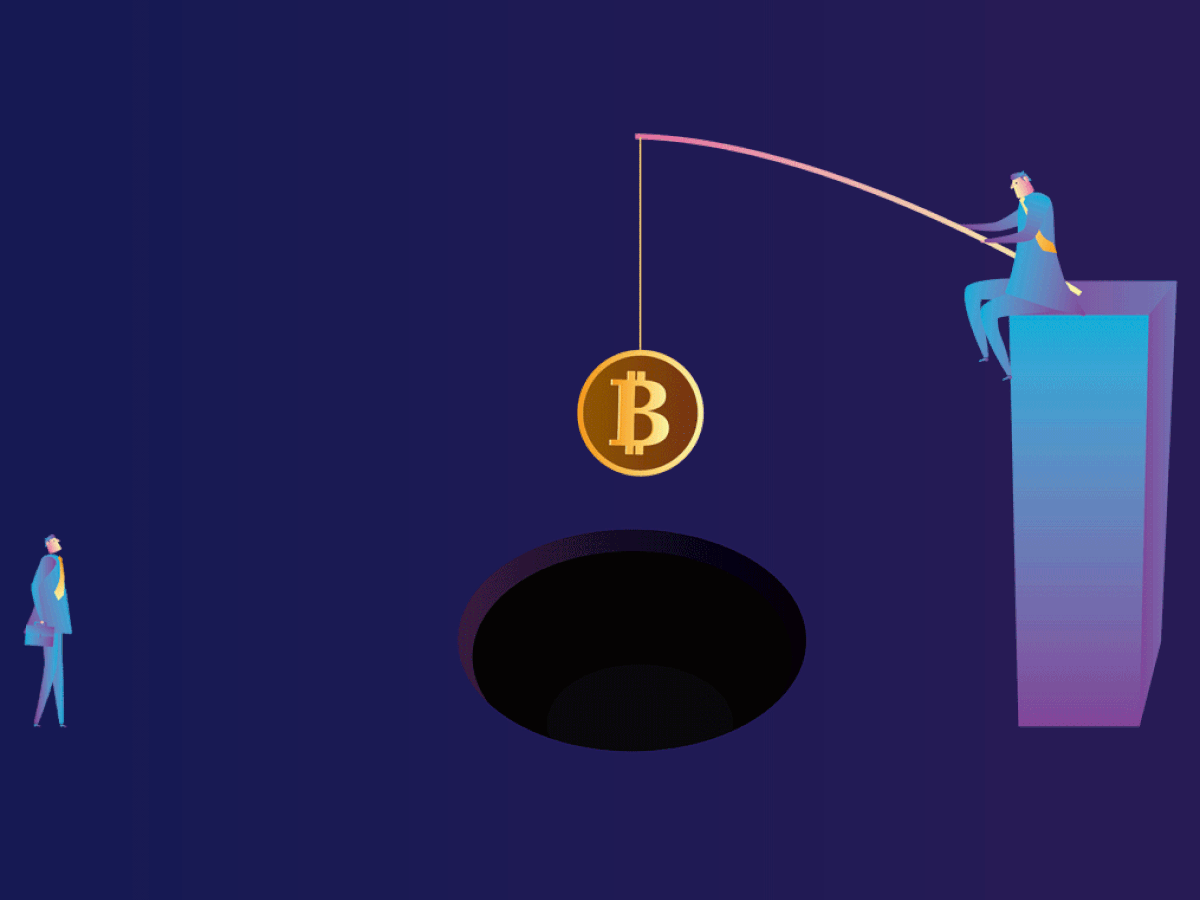

##📋**Scope & Objective** :
######The objective of this notebook is to find the patterns of transactions performed and help algorithms learn those patterns in identifying the fradulent transactions and flag them

##🧾**Business Statement** :
######Ever since the advent of internet the digital revolution has rising and has creeped into all aspects to our lives. One of the most important digital revolution happend in financial system and especially transacting money to someone from any part of the world digitally. Digital transactions have become a part of daily life like purchasing a product online, sending money to friends, depositing cash in bank account, investment purposes etc., They had a lot of benefits so does paved way for fradulent activities. People started using digital money transactions medium to launder money and make the money look like it comes from a legal source.

###🎯**Aim**:

1.   Exploratory analysis of data to extract the pattern of fraudlent activites
2.   Build a machine learning model to classify fraud and non-fraud transactions
3.   Reduce the false negatives by tuning the model


##📚 Libraries

In [ ]:
!pip install joypy

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from random import sample
import joypy as jp
from pandas.plotting import lag_plot,autocorrelation_plot

#preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV,cross_validate,train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline

#ML libraries
import tensorflow as tf
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras import Input
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import lightgbm as lgb

#Metrics Libraries
from sklearn import metrics
from sklearn.metrics import classification_report,roc_auc_score, roc_curve,auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

##💾**Dataset**

######Here we just import the dataset as we already download from Kaggle. The dataset is huge and would take a long time to process. Let's see the overview of data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mydata=pd.read_csv("/content/drive/MyDrive/Capstone Dataset/transaction_dataset.csv")

In [ ]:
mydata.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421896,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [ ]:
mydata.shape

(9841, 51)

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

##**✈️Exploratory Data Analysis**

It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it

In [ ]:
mydata.describe(include=['int64','float64'])

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9.841000e+03,9841.000000,9.841000e+03,9012.000000,9.012000e+03,9.012000e+03,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.0,9012.0,9012.0,9012.0,9012.000000,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,523.152481,100.711721,4.800090,314.617297,44.755731,0.000003,0.000008,0.000005,283.362362,1.016092e+04,1.163832e+04,0.000008,1.477395e+03,36.255659,1.296207e+08,1.386849e+07,110.939207,5.638038,7.598535,0.003440,4.901909,0.0,0.0,0.0,0.0,485.614688,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,13008.821539,2885.002236,138.609682,6629.212643,239.080215,0.000225,0.000516,0.000323,1352.404013,3.583227e+05,3.642048e+05,0.000516,2.424254e+05,447.528908,1.053858e+10,1.180390e+09,6128.634953,105.252500,81.818470,0.065698,17.246576,0.0,0.0,0.0,0.0,16883.278712,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.560535e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.426905,0.000000,0.164577,0.086184,0.000000,0.000000,0.000000,4.000000,2.262059e-01,2.670424e+00,0.000000,6.214900e-04,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,6.000000,1.729730,0.049126,4.999380,1.606000,0.000000,0.000000,0.000000,8.000000,1.248680e+01,3.052963e+01,0.000000,1.722000e-03,1.000000,1.000000e-12,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7

In [ ]:
mydata.describe(include=['object'])

,Address,ERC20 most sent token type,ERC20_most_rec_token_type
count,9841,9000,8990
unique,9816,305,467
top,0x4cd3bb2110eda1805dc63abc1959a5ee2d386e9f,0,0
freq,2,4399,4399


In [ ]:
corr = mydata.corr()
corr

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
Unnamed: 0,1.000000,0.299357,0.719153,-0.022847,-0.089393,-0.185789,-0.057103,-0.050315,-0.005023,-0.016921,-0.033909,-0.021266,-0.013765,-0.017349,-0.003957,-0.032754,-0.054573,-0.012114,0.000634,-0.003715,-0.067501,-0.027697,-0.016845,0.000634,0.015632,-0.008203,0.000601,2.040507e-02,0.012124,-0.012013,-0.011191,-0.000714,-0.011809,NaN,NaN,NaN,NaN,0.008496,7.638862e-04,0.008451,0.020647,0.020268,0.020190,NaN,NaN,NaN,0.009638,-0.011288
Index,0.299357,1.000000,-0.316268,0.006141,0.041309,0.093342,0.030468,0.037318,0.021667,0.013848,0.017448,0.003851,0.008079,-0.000627,-0.011636,-0.003632,0.011624,-0.004603,0.013046,0.008798,0.045287,-0.012957,-0.000935,0.013046,0.017747,0.014263,-0.000663,2.364851e-03,0.003271,0.008077,0.000758,0.006221,-0.000667,NaN,NaN,NaN,NaN,-0.001782,-6.795122e-04,-0.001780,0.002152,0.001966,0.001918,NaN,NaN,NaN,-0.007285,-0.000746
FLAG,0.719153,-0.316268,1.000000,-0.029754,-0.118533,-0.269354,-0.078006,-0.079316,-0.013711,-0.031941,-0.045584,-0.021641,-0.019259,-0.011881,0.006626,-0.022437,-0.063556,-0.007213,-0.007988,-0.008883,-0.100289,-0.014993,-0.016900,-0.007988,-0.003229,-0.025697,-0.004475,2.476225e-02,0.013514,-0.020554,-0.017539,-0.003047,-0.018527,NaN,NaN,NaN,NaN,0.011163,-4.313011e-03,0.007881,0.025364,0.025038,0.025044,NaN,NaN,NaN,0.009249,-0.018047
Avg min between sent tnx,-0.022847,0.006141,-0.029754,1.000000,0.060979,0.214722,-0.032289,-0.035735,-0.006186,-0.015912,-0.017688,-0.014886,-0.007104,-0.004382,-0.000789,-0.005716,0.003597,-0.000210,0.001044,0.000759,-0.043586,-0.006440,-0.007285,0.001044,-0.001425,-0.012307,-0.002542,-2.104957e-03,-0.004409,-0.009477,-0.001133,-0.012754,0.045615,NaN,NaN,NaN,NaN,0.004673,-2.455932e-03,-0.003149,-0.001687,-0.002020,-0.001965,NaN,NaN,NaN,0.000529,0.047202
Avg min between received tnx,-0.089393,0.041309,-0.118533,0.060979,1.000000,0.303897,-0.040419,-0.053478,-0.008378,-0.029571,-0.025747,-0.045753,-0.011575,-0.009313,-0.008761,-0.012176,-0.040011,-0.003916,-0.003230,-0.003940,-0.060711,-0.009442,-0.010720,-0.003230,-0.002149,-0.020578,-0.003656,-3.876053e-03,-0.006160,-0.014776,-0.016037,-0.014698,-0.014932,NaN,NaN,NaN,NaN,-0.008319,-3.544424e-03,-0.005606,-0.003758,-0.003780,-0.003727,NaN,NaN,NaN,-0.019896,-0.014966
Time Diff between first and last (Mins),-0.185789,0.093342,-0.269354,0.214722,0.303897,1.000000,0.154480,0.148376,-0.003881,0.037043,0.071140,-0.084996,-0.002240,-0.014002,-0.013107,0.014194,-0.046039,0.001734,0.036162,0.029440,0.189311,0.012999,0.014756,0.036162,0.002955,0.075922,0.046788,-5.013726e-03,-0.008389,0.040686,0.080709,0.019961,0.319176,NaN,NaN,NaN,NaN,-0.010543,4.651212e-02,0.049020,-0.006852,-0.006268,-0.006802,NaN,NaN,NaN,0.263939,0.324288
Sent tnx,-0.057103,0.030468,-0.078006,-0.032289,-0.040419,0.154480,1.000000,0.198455,0.320603,0.130064,0.670014,0.024015,0.102109,0.140677,-0.004846,0.225356,0.027468,0.029529,0.013263,0.020865,0.731

**Dropping unnecessary columns**

We dont need the Unnamed: 0,' ERC20_most_rec_token_type',' ERC20 most sent token type', Address and we dont required Index as it is just an outcome of current algorithm.

In [ ]:
mydata=mydata.drop(['Unnamed: 0','Address','Index',' ERC20_most_rec_token_type',' ERC20 most sent token type'],axis=1)

In [ ]:
mydata.isnull().sum()

Unnamed: 0                                                0
Index                                                     0
Address                                                   0
FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                            

As we expected every missing value is in fraud rows. That means that almost 40% of fraud rows have missing values.

In [ ]:
mydata.fillna(mydata.median(), inplace=True)

(9841, 51)


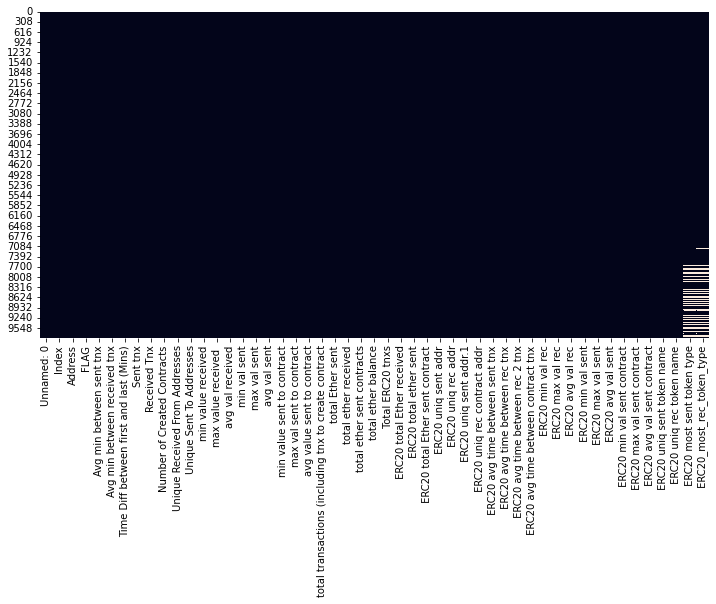

In [ ]:
print(mydata.shape)
plt.figure(figsize=(12,6))
sns.heatmap(mydata.isnull(), cbar=False)
plt.show()

In [ ]:
# We can check how many fraudile transactions there are in the dataset
((mydata["FLAG"] == 1).sum(), (mydata["FLAG"] == 0).sum())

(2179, 7662)

##**📊Data Visualization**

Data visualization is one of the steps of the data science process, which states that after data has been collected, processed and modeled, it must be visualized for conclusions to be made.

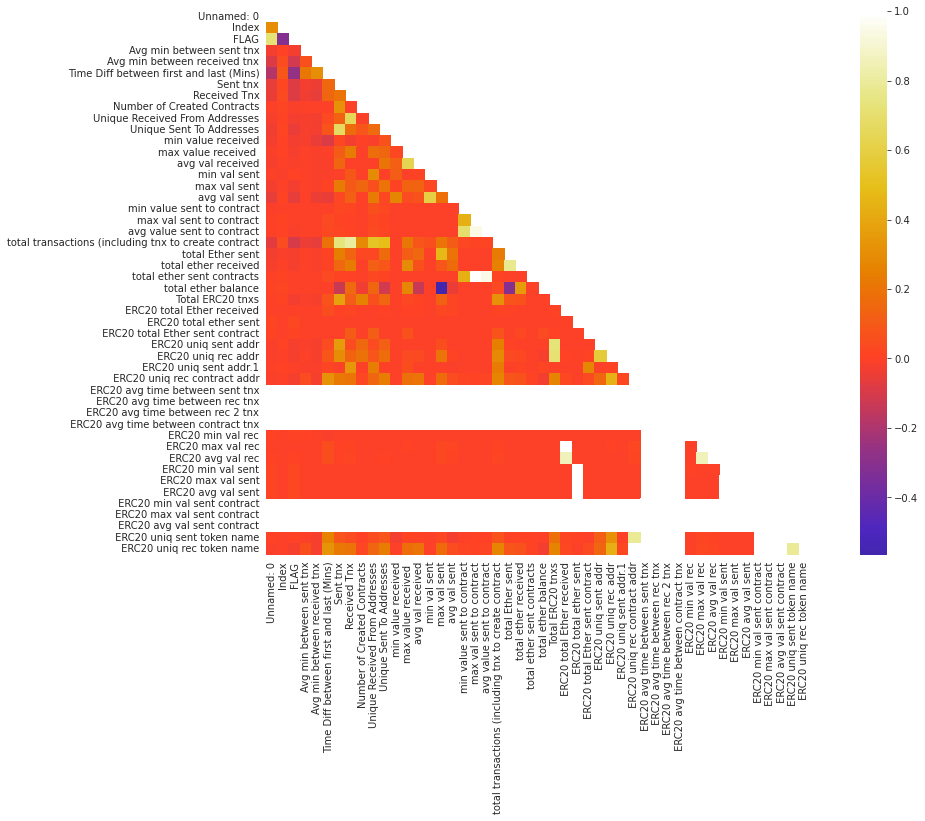

In [ ]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)

* This corr plot shows that How the features are correlated with other features.By looking this plot we have to conclude that which features are highly correlated with others and lowely correlated with others.

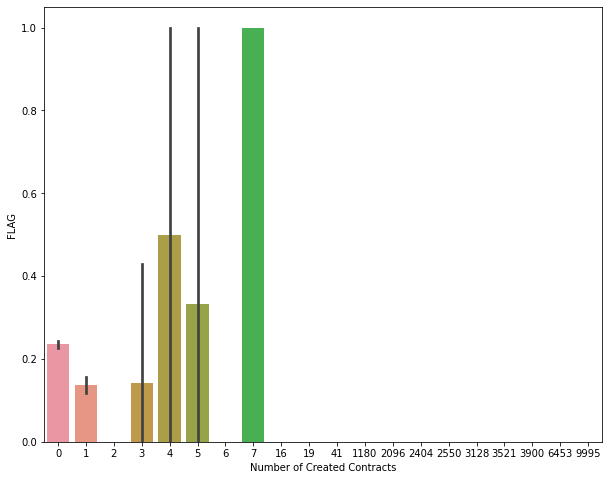

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(mydata['Number of Created Contracts'],mydata['FLAG'])
plt.show()

* By looking this above plot, We can see that the more contacts a user has created, the more likely they are to be of a fraudulent transaction

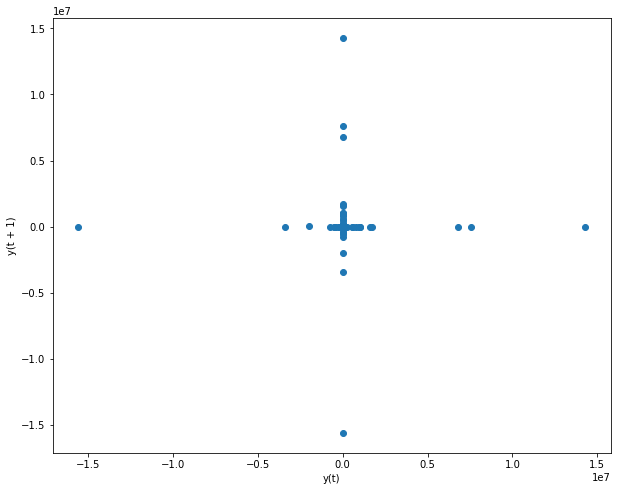

In [ ]:
plt.figure(figsize=(10,8))
lag_plot(mydata['total ether balance'])
plt.show()

* The lag plot shows that with many of the points clustered at the centre, showing us that the data has a few non-zero values, but the points are mainly non-zero, and do not follow any trend

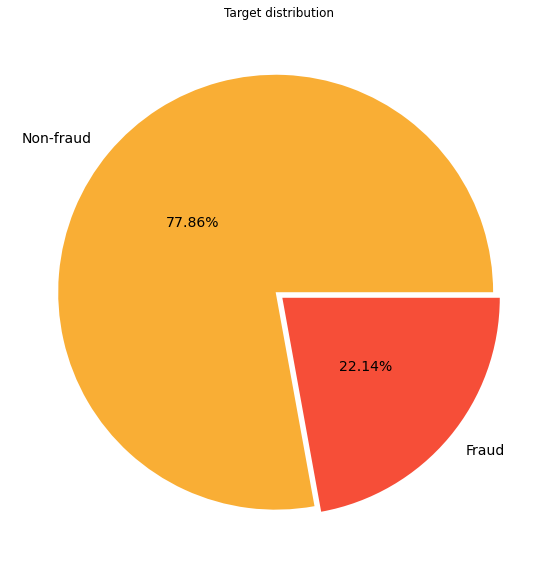

In [ ]:
pie, ax = plt.subplots(figsize=[15,10])
labels = ['Non-fraud', 'Fraud']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = mydata['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution')
plt.show()

* In this pie plot shows us the Distribution of the Flag(Target Vairable).By looking this plot we have to conclude that the Non-fraud transaction having the most of the distribution in the dataset.

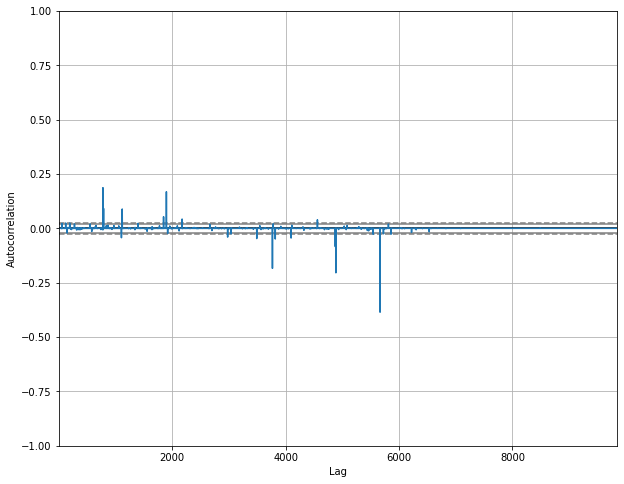

In [ ]:
plt.figure(figsize=(10,8))
autocorrelation_plot(mydata['total ether balance'])
plt.show()

Clearly here we can see that the majority of the data points are random, with the autocorrelation plot showing us that most of the points are located in the 99% confidence band.

<Figure size 720x720 with 0 Axes>

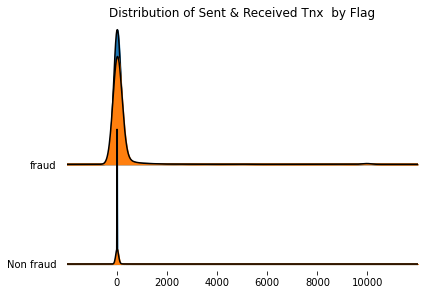

In [ ]:
plt.figure(figsize=(10,10))
fig, axes = jp.joyplot(mydata, column=['Sent tnx', 'Received Tnx'], by="FLAG",labels=['fraud','Non fraud'], ylim='own')

# Decoration
plt.title('Distribution of Sent & Received Tnx  by Flag', fontsize=12)
plt.show()

* By looking the above Joy plot we have to conclude that the Distribution of Sent and Received Tnxo by Flag.

##**🧭Feature Selection**

Feature selection is the process of isolating the most consistent, non-redundant, and relevant features to use in model construction. Methodically reducing the size of datasets is important as the size and variety of datasets continue to grow. The main goal of feature selection is to improve the performance of a predictive model and reduce the computational cost of modeling



In [ ]:
numericals = mydata.select_dtypes(include=['float','int']).columns
mydata[numericals].var()

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

In [ ]:
# Filtering the features with 0 variance
no_var = mydata[numericals].var() == 0
print(mydata[numericals].var()[no_var])
print('\n')

# Drop features with 0 variance --- these features will not help in the performance of the model
mydata.drop(mydata[numericals].var()[no_var].index, axis = 1, inplace = True)
print(mydata.shape)

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64


(9841, 39)



I. **Drop columns that are almost always zero :**

* Because they won't be helpful for our models.

In [ ]:
# Some features present a small distribution
drops = []
for i in mydata.columns[1:]:
    if len(mydata[i].value_counts()) < 10:
        drops.append(i)
#         print(f' {i} has the following distribution: \n{mydata[i].value_counts()}')
        print('Unique values of column:', i)
#         print(i, ': \n', mydata[i].value_counts())
        print(mydata[i].value_counts())
        print()

Unique values of column: min value sent to contract
0.00    9839
0.02       1
0.01       1
Name: min value sent to contract, dtype: int64

Unique values of column: max val sent to contract
0.000000    9838
0.020000       1
0.010000       1
0.046029       1
Name: max val sent to contract, dtype: int64

Unique values of column: avg value sent to contract
0.000000    9838
0.023014       1
0.020000       1
0.010000       1
Name: avg value sent to contract, dtype: int64

Unique values of column: total ether sent contracts
0.000000    9838
0.020000       1
0.046029       1
0.010000       1
Name: total ether sent contracts, dtype: int64

Unique values of column:  ERC20 uniq sent addr.1
0.0    9813
1.0      26
2.0       1
3.0       1
Name:  ERC20 uniq sent addr.1, dtype: int64



In [ ]:
print('Dropped columns:\n')
print(*drops, sep='\n')
mydata.drop(drops, axis=1, inplace=True)

print()
print(mydata.shape)

Dropped columns:

min value sent to contract
max val sent to contract
avg value sent to contract
total ether sent contracts
 ERC20 uniq sent addr.1

(9841, 34)


II. **Select KBest :**

In order to reduce the dimensionality of our problem, we use sklearn's SelectKBest class, which removes all but the $k$ highest scoring features(we choose $k=14$).

As a scoring function we use f_classif, which computes the ANOVA F-value for the provided sample. This is an estimate of the degree of linear dependency between two random variables.

In [ ]:
# define x_indipendent variables and y_dependent variables:
y_dep = mydata.iloc[:, 0]
x_ind = mydata.iloc[:, 1:]
print(x_ind.shape, y_dep.shape)

(9841, 33) (9841,)


In [ ]:
k=14
x_selected = SelectKBest(f_classif, k=k).fit_transform(x_ind, y_dep)
model= SelectKBest(f_classif, k=k).fit(x_ind, y_dep)

Selected_feature_names=x_ind.columns[model.get_support()]
x_ind_new = x_ind[Selected_feature_names]

x_ind_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Avg min between sent tnx                              9841 non-null   float64
 1   Avg min between received tnx                          9841 non-null   float64
 2   Time Diff between first and last (Mins)               9841 non-null   float64
 3   Sent tnx                                              9841 non-null   int64  
 4   Received Tnx                                          9841 non-null   int64  
 5   Unique Received From Addresses                        9841 non-null   int64  
 6   Unique Sent To Addresses                              9841 non-null   int64  
 7   avg val sent                                          9841 non-null   float64
 8   total transactions (including tnx to create contract  9841

##✂️**Treat Outliers**

######We visualize the outliers using box plots


In [ ]:
splt_col=x_ind_new.select_dtypes(include='object')
no_col=x_ind_new.select_dtypes(include=np.number)
print('continuous_Variables are: ',no_col.columns)
print('categorical_Variables are: ',splt_col.columns)

continuous_Variables are:  Index(['Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Unique Received From Addresses', 'Unique Sent To Addresses',
       'avg val sent', 'total transactions (including tnx to create contract',
       ' Total ERC20 tnxs', ' ERC20 uniq rec addr',
       ' ERC20 uniq rec contract addr', ' ERC20 uniq sent token name',
       ' ERC20 uniq rec token name'],
      dtype='object')
categorical_Variables are:  Index([], dtype='object')


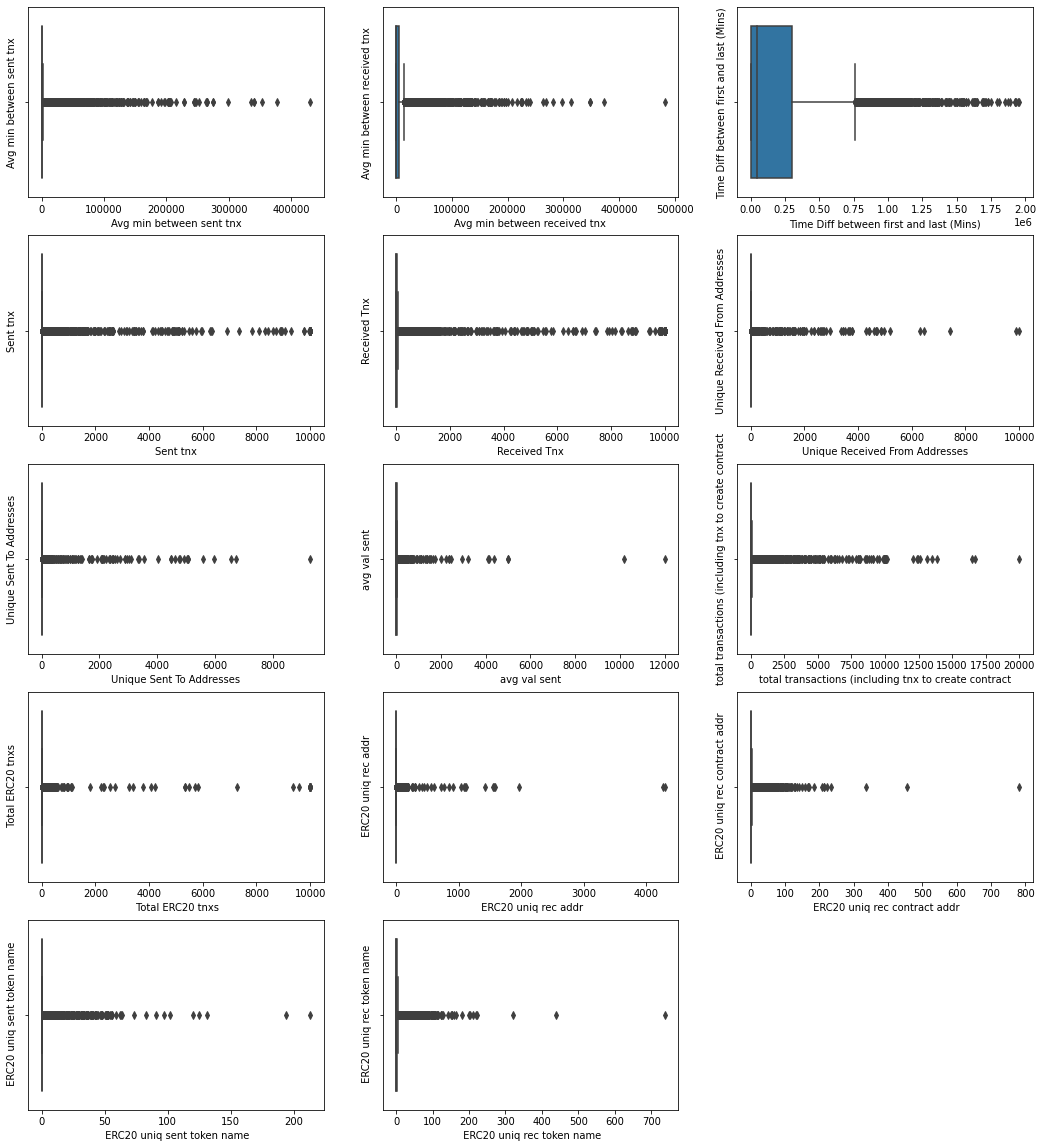

In [ ]:
plt.figure(figsize=(18,100))
for i, col in enumerate(no_col,1):
    plt.subplot(24,3,i)
    sns.boxplot(mydata[col])
    plt.ylabel(col)
plt.show()


There seem to be so many outliers it is likely that the distribution is far from Gaussian, and thus they shouldn't be considered outliers

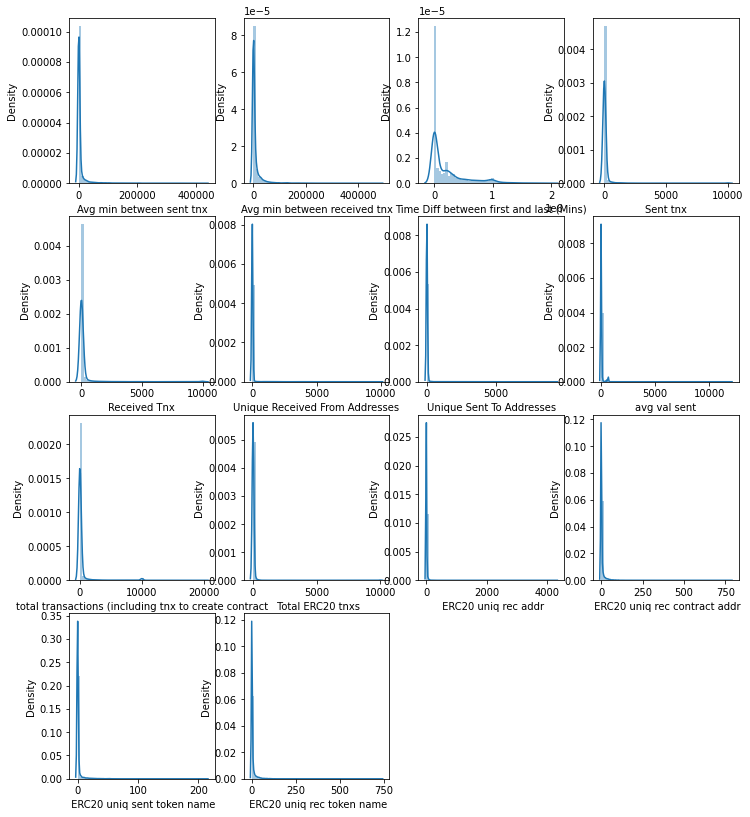

In [ ]:
n_rows = 4
n_cols = 4

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12,14))

for i, column in enumerate(x_ind_new.columns):
    sns.distplot(x_ind_new[column],ax=axes[i//n_cols,i%n_cols])
    
fig.delaxes(axes[3,3])
fig.delaxes(axes[3,2])


We can see that the distribution of the data isn't Gaussian. Thus there is no strong reason to believe that values outside the IQR are outliers, so we will use the values as is.

In [ ]:
x_ind.shape

(9841, 33)

In [ ]:
x_ind_new.shape

(9841, 14)

So, looking the above code removed 19 rows  from the dataset i.e.

## **💔Split into Train and Test Sets**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_ind_new, y_dep, test_size = 0.2, random_state = 4)

##**🔔Normalization**

Normalization is the ideal choice when we know that the distribution of data does not follow a Gaussian distribution.

Normalization transforms the distribution, and so it distorts outliers. Because of this, it is useful when there are no outliers. As we saw, we have a highly skewed data distribution with no clear notion of outlier, so it is safe to normalize the data.

You do not need to scale the Y of train data as the algorithm or model will set the parameter values to get least Cost(error), that is k{Y(output)-Y(original)} anyway. But if the Xtrain was scaled then the test set(feature values, Xtest)(Scale Ytest only if the Ytrain was scaled) needs to be scaled (using training mean and variance) before feeding it to the model because the model hasn't seen this data before and has been trained on data with scaled range, so if the test data has a feature value diverging from the corresponding feature range in train data by a considerably high value then the model will output a wrong prediction for the corresponding test data

In [ ]:
norm = PowerTransformer()

x_train_norm = norm.fit_transform(x_train)
x_test_norm = norm.transform(x_test)

In [ ]:
mydata_norm= pd.DataFrame(x_train_norm, columns=x_train.columns)

In [ ]:
mydata_norm

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Unique Received From Addresses,Unique Sent To Addresses,avg val sent,total transactions (including tnx to create contract,Total ERC20 tnxs,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 uniq sent token name,ERC20 uniq rec token name
0,-1.100834,0.604072,-0.408023,-1.398717,-0.604933,-0.831685,-1.499269,-1.139562,-1.014575,1.003211,0.243766,0.239953,2.135534,0.241168
1,1.252588,0.636798,1.126567,1.601925,1.276777,1.696920,1.958718,0.687032,1.317824,1.908365,1.918444,1.858421,2.378058,1.859919
2,1.556818,1.045134,0.602872,0.199398,-0.177359,-0.199296,-0.350485,1.076313,-0.182177,0.141446,0.243766,0.239953,-0.437753,0.241168
3,1.344118,1.093436,0.554164,0.431813,0.160616,0.180128,0.162429,1.165158,0.098189,0.141446,0.243766,0.239953,-0.437753,0.241168
4,-1.100834,-1.178079,-1.639284,-1.398717,-1.788888,-2.244399,-1.499269,-1.139562,-2.083234,0.141446,0.243766,0.239953,-0.437753,0.241168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7867,0.112619,-1.178079,-1.129560,0.029017,-0.995845,-0.831685,0.469674,1.201123,-0.601621,-0.972121,-0.987932,-0.986788,-0.437753,-0.987071
7868,-1.100834,1.441069,0.710799,-0.596399,-0.355856,-0.199296,-0.350485,-0.316263,-0.601621,0.588665,0.718495,0.711301,-0.437753,0.712888
7869,-1.100834,-1.178079,-1.639284,-1.398717,-0.995845,-0.831685,-1.499269,-1.139562,-1.378275,1.119853,1.261096,1.248481,-0.437753,1.250273
7870,1.189011,0.515248,0.258146,0.792477,0.577410,1.286091,1.316650,-0.274633,0.485010,0.839506,0.718495,0.968538,-0.437753,0.970257


##**⚖️Balancing and Distribution the Dataset**

It is crucial to have balanced class distribution, i.e., there should be no significant difference between positive and negative classes. The models trained on datasets with imbalanced class distribution tend to be biased and show poor performance toward minor class.

We use Synthetic Minority Oversampling Technique (SMOTE). This technique generates synthetic data for the minority class. SMOTE proceeds by joining the points of the minority class with line segments and then placing artificial points along those lines

In [ ]:
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {x_train_norm.shape, y_train.shape}')

x_train_new, y_train_new = oversample.fit_resample(x_train_norm, y_train)
print(f'Shape of the training after SMOTE: {x_train_new.shape, y_train_new.shape}')

Shape of the training before SMOTE: ((7872, 14), (7872,))
Shape of the training after SMOTE: ((12224, 14), (12224,))


In [ ]:
y_train_after_norm= pd.DataFrame(y_train_new)

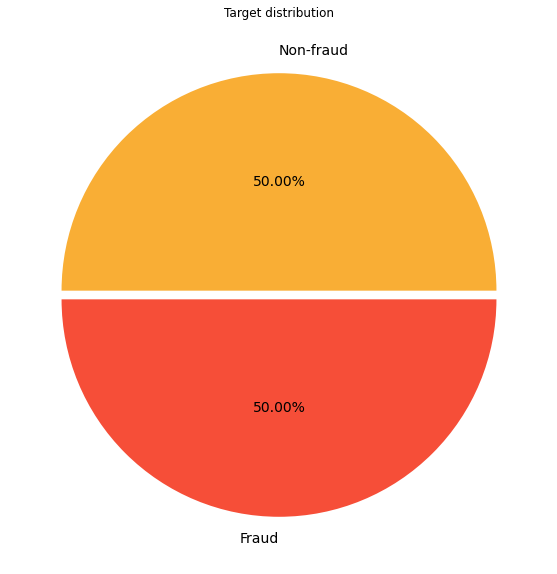

In [ ]:
pie, ax = plt.subplots(figsize=[15,10])
labels = ['Non-fraud', 'Fraud']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = y_train_after_norm.value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution')
plt.show()

##🏗️**Model Building(Supervised Learning)**

We have successfully processed the data and it is time for serving the data to the Supervised models. select the best which gives out the maximum accuracy

* LogisticRegression

In [ ]:
#Model and fitting
LR = LogisticRegression()
LR.fit(x_train_new,y_train_new)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#prediction
Pred_LR=LR.predict(x_test_norm)
Pred_LR

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
#confusion_matrix
confusion_matrix(y_test,Pred_LR)

array([[1411,  139],
       [  25,  394]])

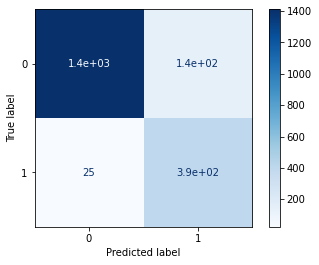

In [ ]:
#visualize confustion matrix
plot_confusion_matrix(LR, x_test_norm, y_test, cmap="Blues") 
plt.show()

In [ ]:
#accuracy score
accuracy_score(y_test,Pred_LR)*100

91.67089893346876

In [ ]:
#Classification report
clss_rpt_LR=classification_report(y_test,Pred_LR,output_dict=True)

acc = clss_rpt_LR['accuracy']
prec = clss_rpt_LR['1']['precision']
rec = clss_rpt_LR['1']['recall']
f1 = clss_rpt_LR['1']['f1-score']

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(classification_report(y_test,Pred_LR))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95      1550
           1       0.74      0.94      0.83       419

    accuracy                           0.92      1969
   macro avg       0.86      0.93      0.89      1969
weighted avg       0.93      0.92      0.92      1969



**Considering the confusion matrix :**

LR model, correctly identified 395 (TP) of FRAUD cases, out of 419 (P).
LR model flagged as FRAUD 135 (FP) out of 1415, when this cases were actually NON-FRAUD
Dealing with a fraud detection scenario, we care more about the transactions that were actualy FRAUDS, but which were treated as NON-FRAUD by our model (FN - 23) TYPE II ERROR

Therby, let's try to increase the precision using other methods.

*  **Decision Tree Classifier**


In [ ]:
#Model and fitting
Tree=DecisionTreeClassifier(random_state=4)
Tree=Tree.fit(x_train_new,y_train_new)

In [ ]:
#prediction
Pred_Tree=Tree.predict(x_test_norm)
Pred_Tree

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
#confusion_matrix
confusion_matrix(y_test,Pred_Tree)

array([[1506,   44],
       [  27,  392]])

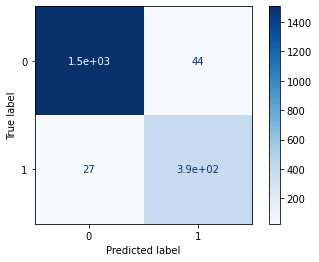

In [ ]:
#visualize confustion matrix
plot_confusion_matrix(Tree, x_test_norm, y_test, cmap="Blues") 
plt.show()

In [ ]:
#accuracy score
accuracy_score(y_test,Pred_Tree)*100

96.39410868461148

In [ ]:
#Classification report
clss_rpt_Tree=classification_report(y_test,Pred_Tree,output_dict=True)

acc = clss_rpt_Tree['accuracy']
prec = clss_rpt_Tree['1']['precision']
rec = clss_rpt_Tree['1']['recall']
f1 = clss_rpt_Tree['1']['f1-score']

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

print(classification_report(y_test,Pred_Tree))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1550
           1       0.90      0.94      0.92       419

    accuracy                           0.96      1969
   macro avg       0.94      0.95      0.95      1969
weighted avg       0.96      0.96      0.96      1969



By Looking this figure the Decision Tree Model Accuracy is 96% It’s too good. Let’s see the other model accuracy then we conclude it which one is Best.



* **Random Forest Classifier**

In [ ]:
#Model and fitting
RF=RandomForestClassifier(random_state=4)
RF.fit(x_train_new,y_train_new)

#Prediction
Pred_RF=RF.predict(x_test_norm)

In [ ]:
#confusion_matrix
confusion_matrix(y_test,Pred_RF)

array([[1525,   25],
       [  19,  400]])

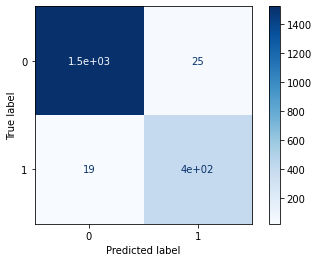

In [ ]:
#visualize confustion matrix
plot_confusion_matrix(RF, x_test_norm, y_test, cmap="Blues") 
plt.show()

In [ ]:
#accuracy score
accuracy_score(y_test,Pred_RF)*100

97.76536312849163

In [ ]:
#Classification report
clss_rpt_RF=classification_report(y_test,Pred_RF,output_dict=True)

acc = clss_rpt_RF['accuracy']
prec = clss_rpt_RF['1']['precision']
rec = clss_rpt_RF['1']['recall']
f1 = clss_rpt_RF['1']['f1-score']

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

print(classification_report(y_test,Pred_RF))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1550
           1       0.94      0.95      0.95       419

    accuracy                           0.98      1969
   macro avg       0.96      0.97      0.97      1969
weighted avg       0.98      0.98      0.98      1969



By Looking this figure the Random Forest Model Accuracy is 98% It’s good. Let’s see the other model accuracy then we conclude it which one is Best.

* **XGB Classifier**

In [ ]:
#Model and fitting
XG=XGBClassifier(random_state=4)
XG.fit(x_train_new,y_train_new)

#Prediction
Pred_XG=XG.predict(x_test_norm)

In [ ]:
#confusion_matrix
confusion_matrix(y_test,Pred_XG)

array([[1508,   42],
       [  16,  403]])

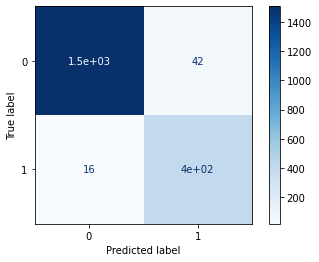

In [ ]:
#visualize confustion matrix
plot_confusion_matrix(XG, x_test_norm, y_test, cmap="Blues") 
plt.show()

In [ ]:
#accuracy score
accuracy_score(y_test,Pred_XG)*100

97.05434230573896

In [ ]:
#Classification report
clss_rpt_XG=classification_report(y_test,Pred_XG,output_dict=True)

acc = clss_rpt_XG['accuracy']
prec = clss_rpt_XG['1']['precision']
rec = clss_rpt_XG['1']['recall']
f1 = clss_rpt_XG['1']['f1-score']

model_results = pd.DataFrame([['XGB Classifier', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

print(classification_report(y_test,Pred_XG))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1550
           1       0.91      0.96      0.93       419

    accuracy                           0.97      1969
   macro avg       0.95      0.97      0.96      1969
weighted avg       0.97      0.97      0.97      1969



* **ROC curve for XGB**

In [ ]:
var= roc_auc_score(y_test,Pred_XG)
fpr, tpr, threshold = roc_curve(y_test,XG.predict_proba(x_test_norm)[:,1])
roc_auc = auc(fpr, tpr)

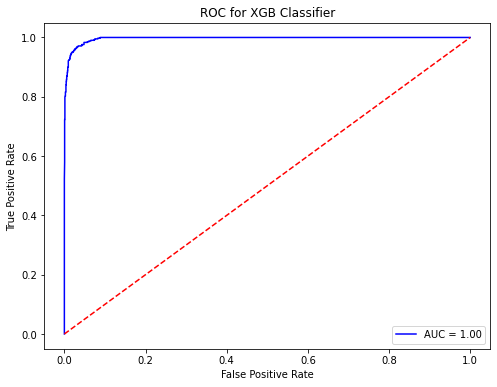

In [ ]:
plt.figure(figsize=(8,6))
plt.title('ROC for XGB Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

By Looking this figure the XGB Model Accuracy is 97% It’s good. Let’s see the other model accuracy then we conclude it which one is Best

* **K-Nearest Neighbors (KNN)**

In [ ]:
#Model and fitting
KNN=KNeighborsClassifier(n_neighbors=15,p=2,metric='euclidean')
KNN.fit(x_train_new,y_train_new)

#Prediction
Pred_KNN=KNN.predict(x_test_norm)

In [ ]:
#confusion_matrix
confusion_matrix(y_test,Pred_KNN)

array([[1498,   52],
       [  17,  402]])

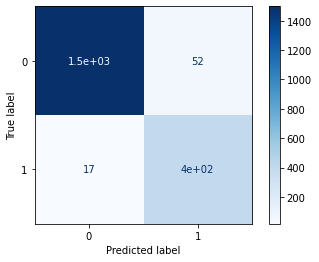

In [ ]:
#visualize confustion matrix
plot_confusion_matrix(KNN, x_test_norm, y_test, cmap="Blues") 
plt.show()

In [ ]:
#accuracy score
accuracy_score(y_test,Pred_KNN)*100

96.49568308786186

In [ ]:
#Classification report
clss_rpt_KNN=classification_report(y_test,Pred_KNN,output_dict=True)

acc = clss_rpt_KNN['accuracy']
prec = clss_rpt_KNN['1']['precision']
rec = clss_rpt_KNN['1']['recall']
f1 = clss_rpt_KNN['1']['f1-score']

model_results = pd.DataFrame([['K-Nearest Neighbors', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

print(classification_report(y_test,Pred_KNN))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1550
           1       0.89      0.96      0.92       419

    accuracy                           0.96      1969
   macro avg       0.94      0.96      0.95      1969
weighted avg       0.97      0.96      0.97      1969



By Looking this figure the KNN Model Accuracy is 96% It’s good. Let’s see the other model accuracy then we conclude it which one is Best.

##**👷Voting Method for Some Models**

In [ ]:
preprocessing_pipeline = Pipeline([
    ('impoter', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
def evaluate_models(x_train_new, y_train_new, models, cv):
    f1_scores = dict()
    acc_scores = dict()
    
    for i, model in enumerate(models):
        clf_pipeline = make_pipeline(preprocessing_pipeline, model)
        results = cross_validate(clf_pipeline, x_train_new, y_train_new, cv=cv, scoring=['f1', 'accuracy'], n_jobs=-1)
        avg_f1 = np.mean(results['test_f1'])
        avg_acc = np.mean(results['test_accuracy'])
        
        model_name = model.__class__.__name__
        f1_scores[model_name] = avg_f1
        acc_scores[model_name] = avg_acc
        print('{}-of-{}: {} f1={}, acc={}'.format(i+1, len(models), model_name, avg_f1, avg_acc))
    return f1_scores, acc_scores

In [ ]:
cv = StratifiedKFold(5, shuffle=True, random_state=4)

classifiers = [
    lgb.LGBMClassifier(random_state=4),
    SVC(random_state=4),
    AdaBoostClassifier(random_state=4),
    GaussianNB(),
    MLPClassifier(random_state=4),
]

In [ ]:
f1_scores, acc_scores = evaluate_models(x_train_new, y_train_new, classifiers, cv)

1-of-5: LGBMClassifier f1=0.9833013186673986, acc=0.9832300462883937
2-of-5: SVC f1=0.9704674990388182, acc=0.9703046398843291
3-of-5: AdaBoostClassifier f1=0.9659283700631874, acc=0.9656418289103318
4-of-5: GaussianNB f1=0.873097982577549, acc=0.8723824298227119
5-of-5: MLPClassifier f1=0.9772039524556326, acc=0.9770946083894785


## **💽Performance Comparison for the Different Models**


In [ ]:
results.sort_values(by=['Accuracy'], ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
2,Random Forest,0.977654,0.941176,0.954654,0.947867
3,XGB Classifier,0.970543,0.905618,0.961814,0.932870
4,K-Nearest Neighbors,0.964957,0.885463,0.959427,0.920962
1,Decision Tree,0.963941,0.899083,0.935561,0.916959
0,Logistic Regression,0.916709,0.739212,0.940334,0.827731


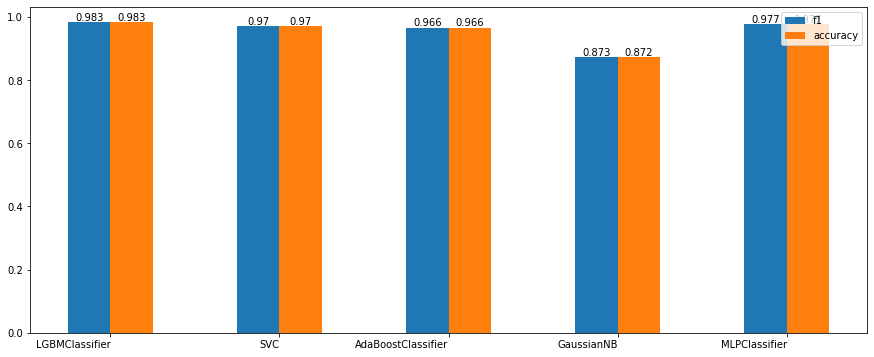

In [ ]:
def visualize_scores(f1_scores, acc_scores):
    x = np.arange(len(f1_scores))
    width = 0.25
    
    f1_values = list(f1_scores.values())
    acc_values = list(acc_scores.values())
    
    plt.figure(figsize=(15, 6)).tight_layout()
    plt.bar(x - width / 2, f1_values, width, label='f1')
    plt.bar(x + width / 2, acc_values, width, label='accuracy')
    
    for index, value in enumerate(x - width / 2):
        plt.text(value, f1_values[index], '{:.3}'.format(f1_values[index]),
                 verticalalignment='bottom', horizontalalignment='center', fontsize=10)

    for index, value in enumerate(x + width / 2):
        plt.text(value, acc_values[index], '{:.3}'.format(acc_values[index]),
                 verticalalignment='bottom', horizontalalignment='center', fontsize=10)    
    
    classifiers_names = f1_scores.keys()
    plt.xticks(x, classifiers_names, rotation=0, horizontalalignment='right', fontsize=10)
    plt.legend()

visualize_scores(f1_scores, acc_scores)

##🏗️**Model Building(Deep Learning)**

We have successfully processed the data and it is time for serving the data to the Supervised models. select the best which gives out the maximum accuracy

* **Keras Model**

In [ ]:
#create model
model = Sequential()
#add model layers
model.add(Dense(units=100,kernel_initializer='he_uniform',activation='relu',input_dim=14))
model.add(Dense(units=100,kernel_initializer='he_uniform',activation='relu'))
# Output layers
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1500      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_keras=model.fit(x_train_new, y_train_new, validation_data=(x_test_norm, y_test), epochs=20)

Epoch 1/20
382/382 [==============================] - 1s 2ms/step - loss: 0.1464 - accuracy: 0.9475 - val_loss: 0.0981 - val_accuracy: 0.9614
Epoch 2/20
382/382 [==============================] - 1s 2ms/step - loss: 0.0901 - accuracy: 0.9668 - val_loss: 0.0698 - val_accuracy: 0.9731
Epoch 3/20
382/382 [==============================] - 1s 2ms/step - loss: 0.0818 - accuracy: 0.9701 - val_loss: 0.0834 - val_accuracy: 0.9685
Epoch 4/20
382/382 [==============================] - 1s 2ms/step - loss: 0.0766 - accuracy: 0.9717 - val_loss: 0.0878 - val_accuracy: 0.9634
Epoch 5/20
382/382 [==============================] - 1s 2ms/step - loss: 0.0732 - accuracy: 0.9717 - val_loss: 0.0735 - val_accuracy: 0.9711
Epoch 6/20
382/382 [==============================] - 1s 2ms/step - loss: 0.0695 - accuracy: 0.9747 - val_loss: 0.0641 - val_accuracy: 0.9716
Epoch 7/20
382/382 [==============================] - 1s 2ms/step - loss: 0.0662 - accuracy: 0.9759 - val_loss: 0.0599 - val_accuracy: 0.9746
Epoch 

* **Prediction Process Using Keras**

In [ ]:
y_pred_keras=model.predict(x_test_norm)

In [ ]:
y_pred_keras=(y_pred_keras>0.5)

* **Confustion Matrix**

In [ ]:
confusion_matrix(y_pred_keras,y_test)

array([[1515,   15],
       [  35,  404]])

* **Model Accuracy Score**

In [ ]:
accuracy_score(y_pred_keras,y_test)*100

97.46063991874048

* **Model loss & accuracy visualization**

In [ ]:
print(model_keras.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


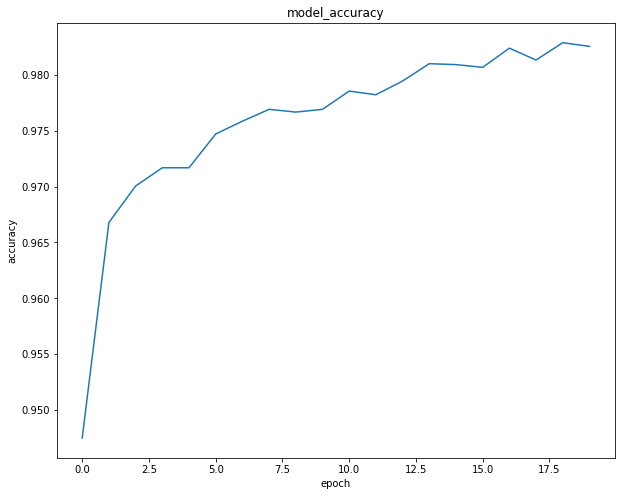

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(model_keras.history['accuracy'])
plt.title("model_accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

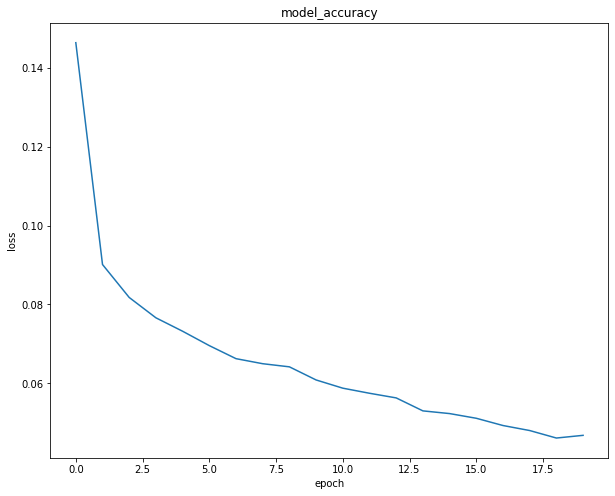

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(model_keras.history['loss'])
plt.title("model_loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

By Looking this figure the ANN Model Accuracy is 97% It’s good. Let’s we conclude it which one is Best.

# **🏆Conclusion :**

* In this Project, we built a Multi models that could approximately Detecting a Fraud transactions of ETHEREUM  given some information about the population.


* Looking the above models that could give us a Model Accuracy are,
 
#### Supervised Learning Models :

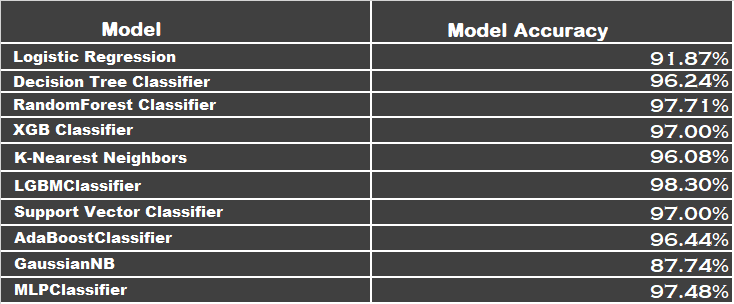
 
 #### Deep Learning Model : 
  
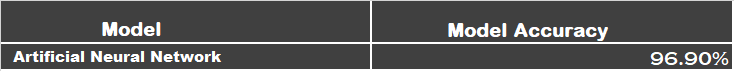

#### Since, All the above Model is giving us the best Accuracy ,So we used it for the Upcoming Future prediction Process.

